In [138]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [139]:
data = pd.read_csv('train.csv')
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [140]:
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [141]:
print(data.duplicated().sum())
data.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  

In [142]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [143]:
label_encoder = LabelEncoder()

In [144]:
for column in data.columns:
   if data[column].dtype == 'object':
    data[column] = label_encoder.fit_transform(data[column])

In [145]:
print(data.duplicated().sum())
data.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  int64  
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  int64  
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  

In [146]:
data.drop(columns=['ID', 'Customer_ID','Name','SSN','Type_of_Loan'], inplace=True)

In [147]:
data.shape

(100000, 23)

In [148]:
data.head(8)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089,0
1,2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162,0
2,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863,0
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,1,809.98,31.377862,268.0,1,49.574949,21.46538,5,223.451310,0
4,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,1,809.98,24.797347,269.0,1,49.574949,21.46538,1,341.489231,0
5,6,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,8.0,...,1,809.98,27.262259,270.0,1,49.574949,21.46538,1,340.479212,0
6,7,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,22.537593,271.0,1,49.574949,21.46538,5,244.565317,0
7,8,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,23.933795,272.0,1,49.574949,21.46538,1,358.124168,2


In [149]:
data.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.500000,33.316340,6.949840,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,...,1.22080,1426.220376,32.285173,221.220460,1.403190,107.699208,55.101315,2.762130,392.697586,1.353460
std,2.291299,10.764812,4.309542,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,...,0.80462,1155.129026,5.116875,99.680716,0.693378,132.267056,39.006932,1.861339,201.652719,0.764913
min,1.000000,14.000000,0.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,...,0.00000,0.230000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.007760,0.000000
25%,2.750000,24.000000,3.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,...,1.00000,566.072500,28.052567,144.000000,1.000000,29.268886,27.959111,1.000000,267.615983,1.000000
50%,4.500000,33.000000,7.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,...,1.00000,1166.155000,32.305784,219.000000,2.000000,66.462304,45.156550,3.000000,333.865366,2.000000
75%,6.250000,42.000000,11.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,...,2.00000,1945.962500,36.496663,302.000000,2.000000,147.392573,71.295797,5.000000,463.215683,2.000000
max,8.000000,56.000000,14.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,...,2.00000,4998.070000,50.000000,404.000000,2.000000,1779.103254,434.191089,5.000000,1183.930696,2.000000


<Axes: >

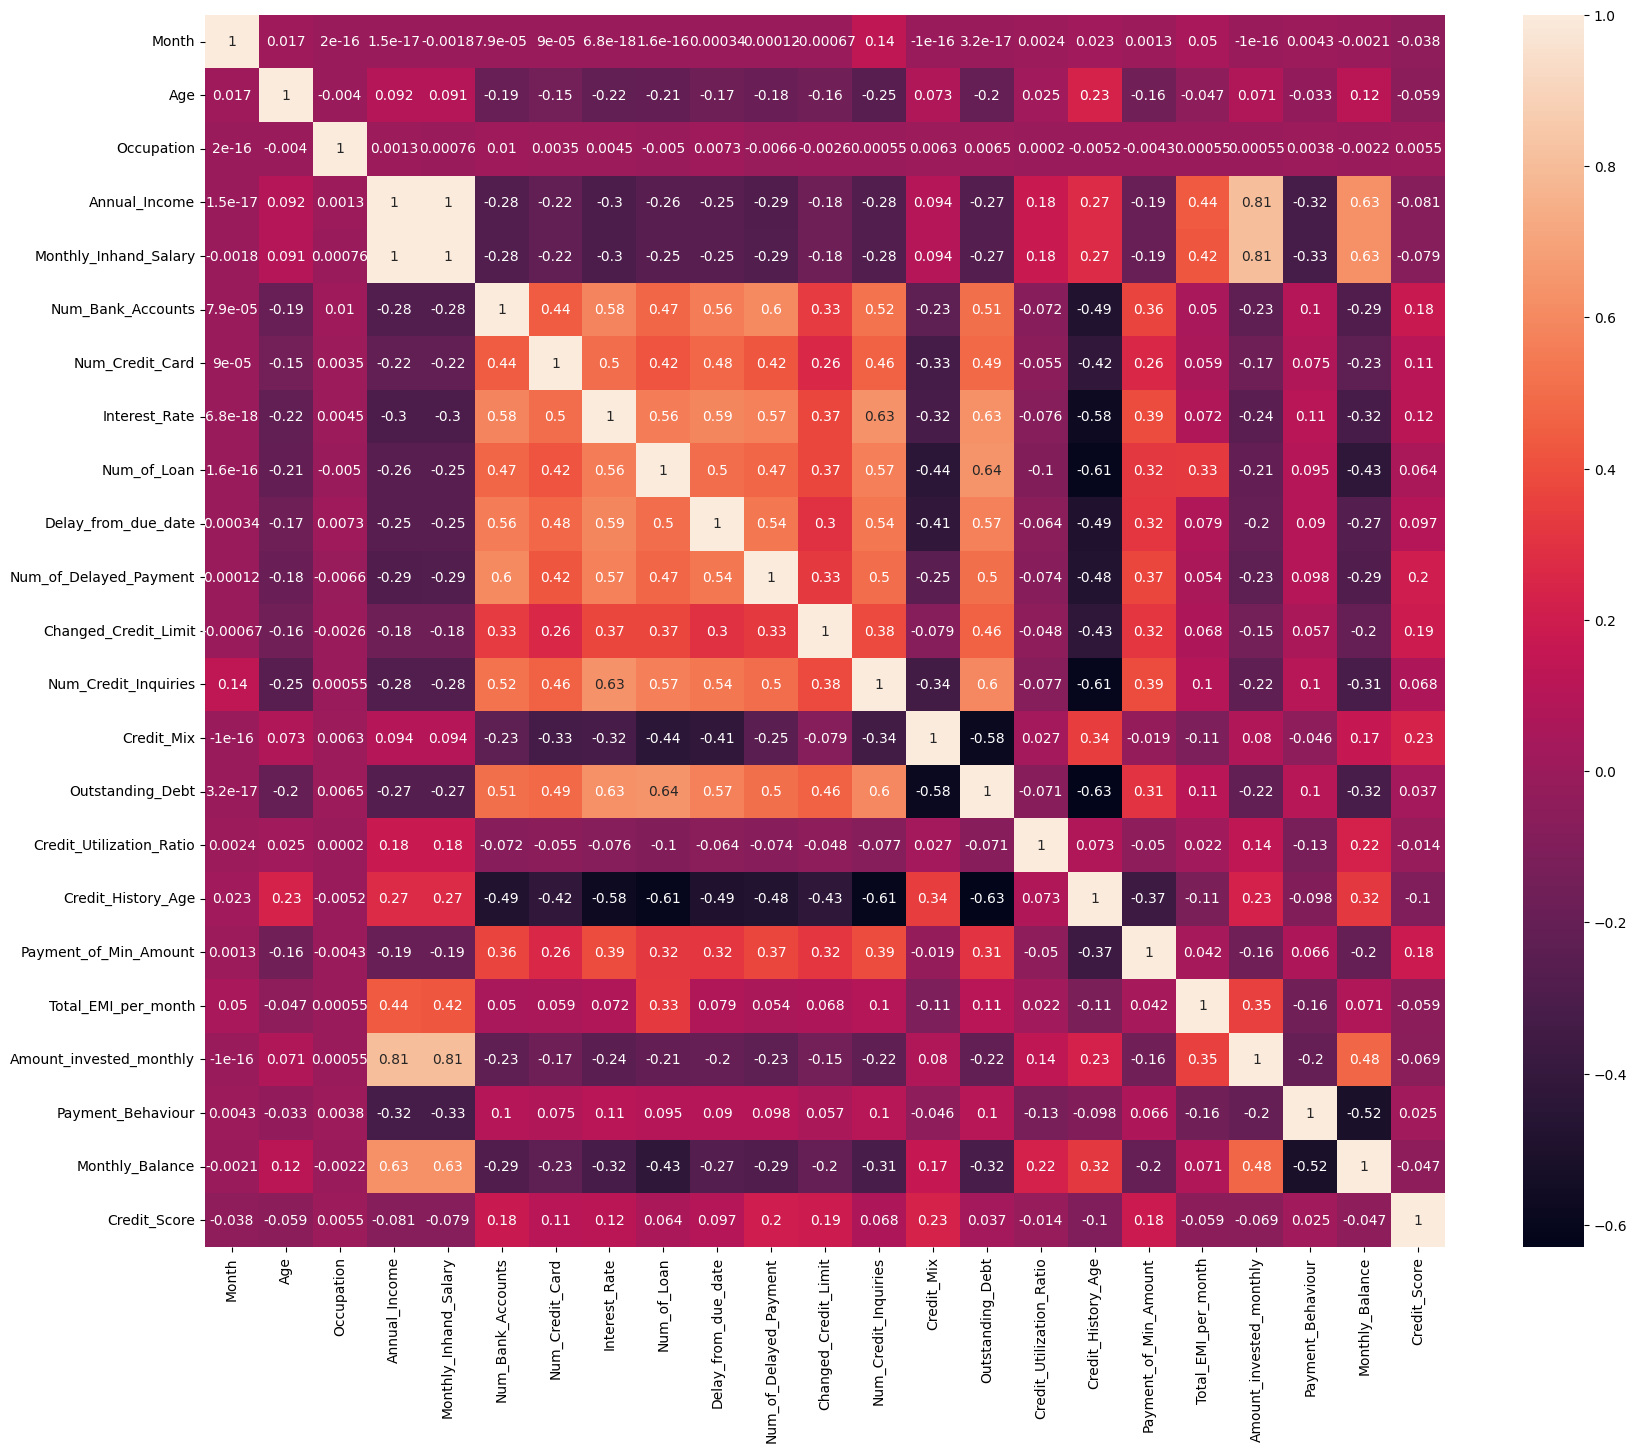

In [150]:
df_num = data.select_dtypes(include=['float','int64'])
corr_mat = df_num.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr_mat,annot=True)

In [151]:
corr_mat['Credit_Score'].sort_values(ascending=False)

Credit_Score                1.000000
Credit_Mix                  0.229920
Num_of_Delayed_Payment      0.203116
Changed_Credit_Limit        0.190080
Payment_of_Min_Amount       0.179948
Num_Bank_Accounts           0.177389
Interest_Rate               0.121088
Num_Credit_Card             0.113333
Delay_from_due_date         0.097286
Num_Credit_Inquiries        0.067845
Num_of_Loan                 0.064064
Outstanding_Debt            0.037153
Payment_Behaviour           0.025452
Occupation                  0.005548
Credit_Utilization_Ratio   -0.014371
Month                      -0.038069
Monthly_Balance            -0.047380
Age                        -0.058923
Total_EMI_per_month        -0.059341
Amount_invested_monthly    -0.068770
Monthly_Inhand_Salary      -0.078770
Annual_Income              -0.080700
Credit_History_Age         -0.102598
Name: Credit_Score, dtype: float64

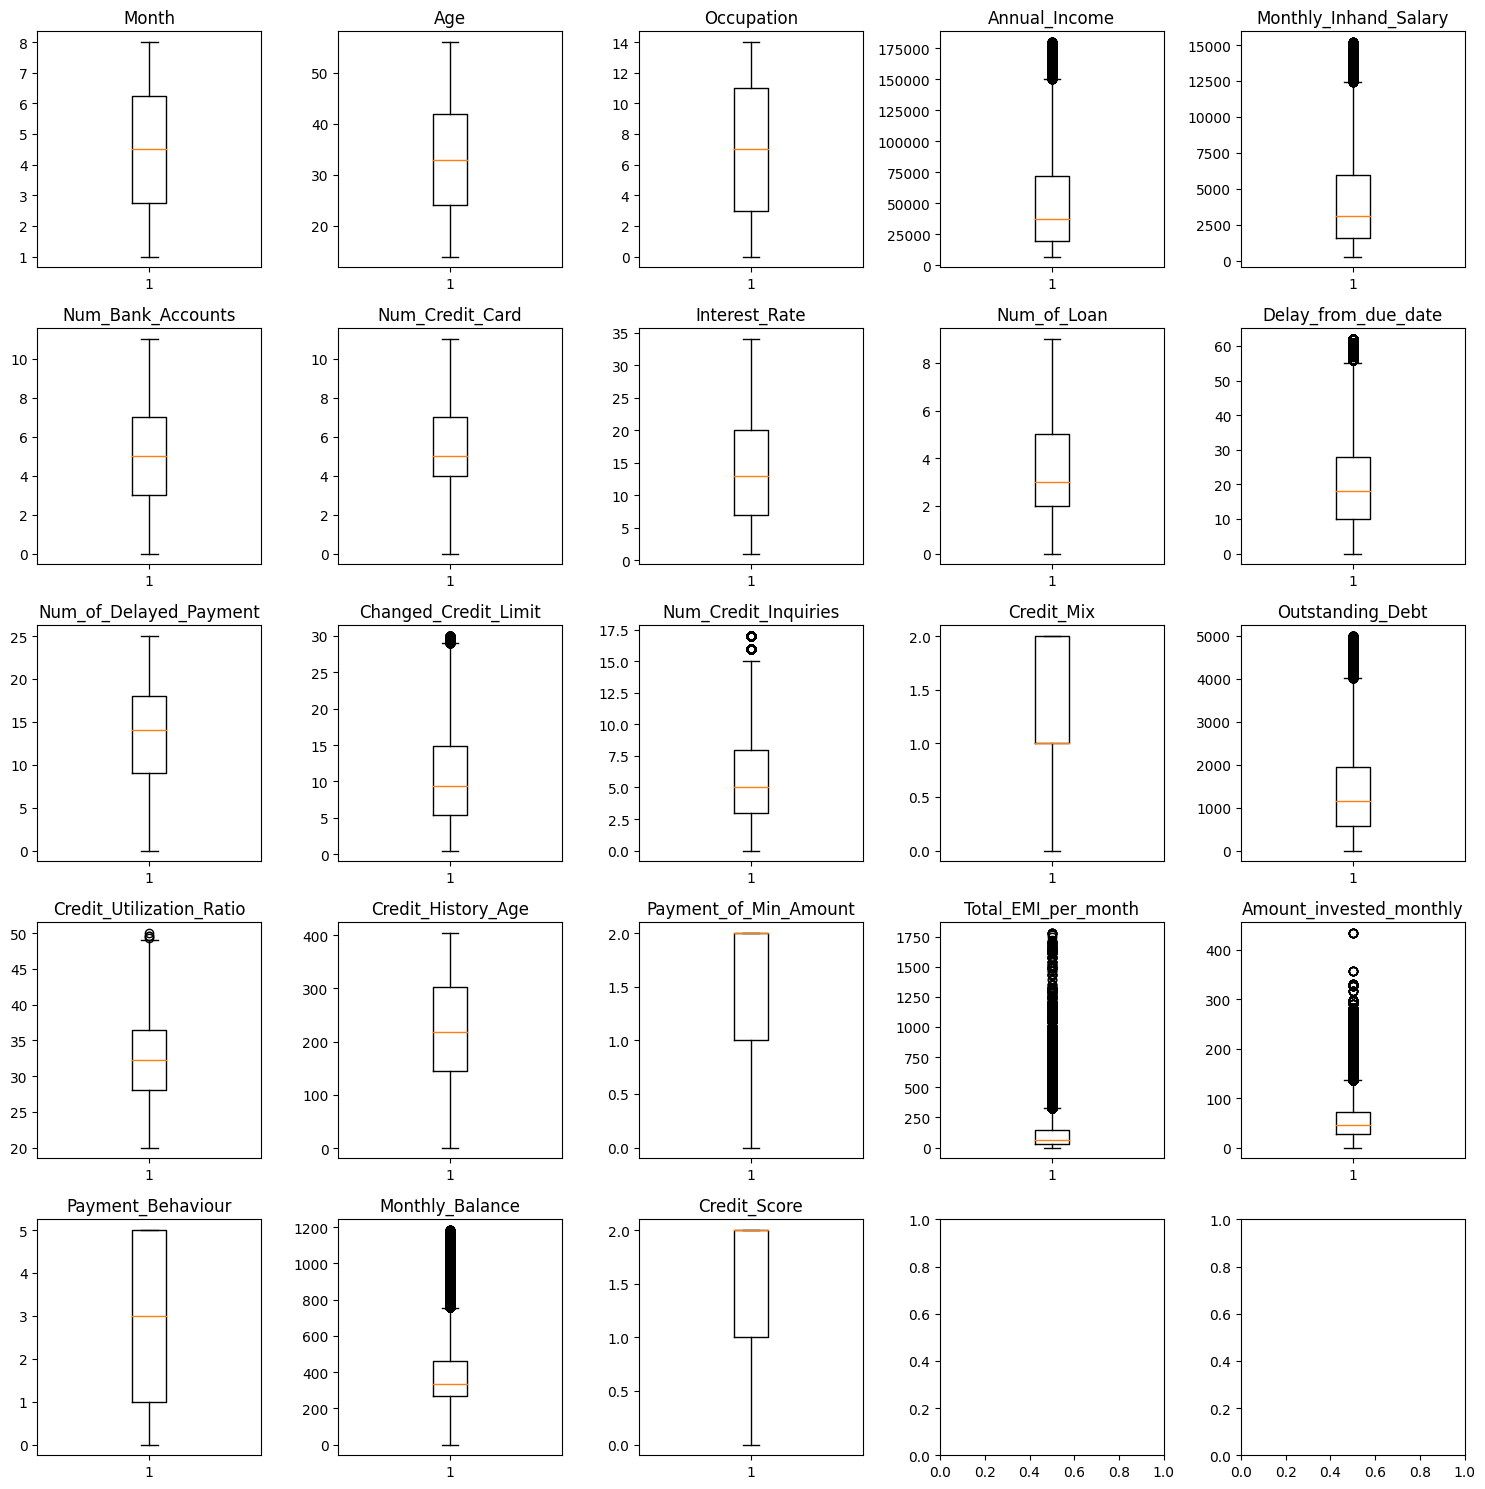

In [152]:
numeric_columns = data.select_dtypes(include=['float', 'int64']).columns

fig, axs = plt.subplots(5, 5, figsize=(15, 15))

for idx, col in enumerate(numeric_columns):
    if idx < 25:
        row_idx = idx // 5
        col_idx = idx % 5
        axs[row_idx, col_idx].boxplot(data[col])
        axs[row_idx, col_idx].set_title(col)

plt.tight_layout()
plt.show()

In [153]:
new_data = data.copy()

cols = [
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Delay_from_due_date",
    "Total_EMI_per_month",
    "Amount_invested_monthly",
    "Outstanding_Debt",
    "Monthly_Balance",
]

for col in cols:
    q1, q3 = np.percentile(new_data[col], [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers_mask = (new_data[col] < lower_bound) | (new_data[col] > upper_bound)
    new_data = new_data[~outliers_mask]

new_data.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,74501.000000,74501.000000,74501.000000,74501.000000,74501.000000,74501.000000,74501.000000,74501.000000,74501.000000,74501.000000,...,74501.000000,74501.000000,74501.000000,74501.000000,74501.000000,74501.000000,74501.000000,74501.000000,74501.000000,74501.000000
mean,4.480853,33.454249,6.937303,39586.692658,3295.337736,5.274439,5.416652,14.087663,3.338116,19.273688,...,1.342922,1236.060395,31.974353,227.426410,1.402585,77.235042,44.952164,2.959356,351.726224,1.372398
std,2.290951,10.825795,4.300417,26832.078396,2239.222437,2.511100,1.997958,8.429380,2.251469,12.502195,...,0.766611,875.341589,4.992561,95.488895,0.692687,70.655911,25.345598,1.808826,127.927176,0.760944
min,1.000000,14.000000,0.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.230000,20.830946,1.000000,0.000000,0.000000,0.000000,0.000000,5.387082,0.000000
25%,2.000000,25.000000,3.000000,18323.175000,1541.535833,3.000000,4.000000,7.000000,2.000000,10.000000,...,1.000000,544.210000,27.773631,156.000000,1.000000,25.206326,25.986962,1.000000,268.890930,1.000000
50%,4.000000,33.000000,7.000000,32507.760000,2711.096667,5.000000,5.000000,12.000000,3.000000,17.000000,...,2.000000,1111.070000,31.986719,224.000000,2.000000,55.081037,40.144161,3.000000,326.526101,2.000000
75%,6.000000,42.000000,11.000000,56531.600000,4670.243333,7.000000,7.000000,19.000000,5.000000,26.000000,...,2.000000,1689.510000,36.184796,304.000000,2.000000,109.720351,59.238549,5.000000,419.245779,2.000000
max,8.000000,56.000000,14.000000,145932.040000,12034.433333,11.000000,11.000000,34.000000,9.000000,55.000000,...,2.000000,3802.670000,47.555983,404.000000,2.000000,309.611855,126.631332,5.000000,719.718309,2.000000


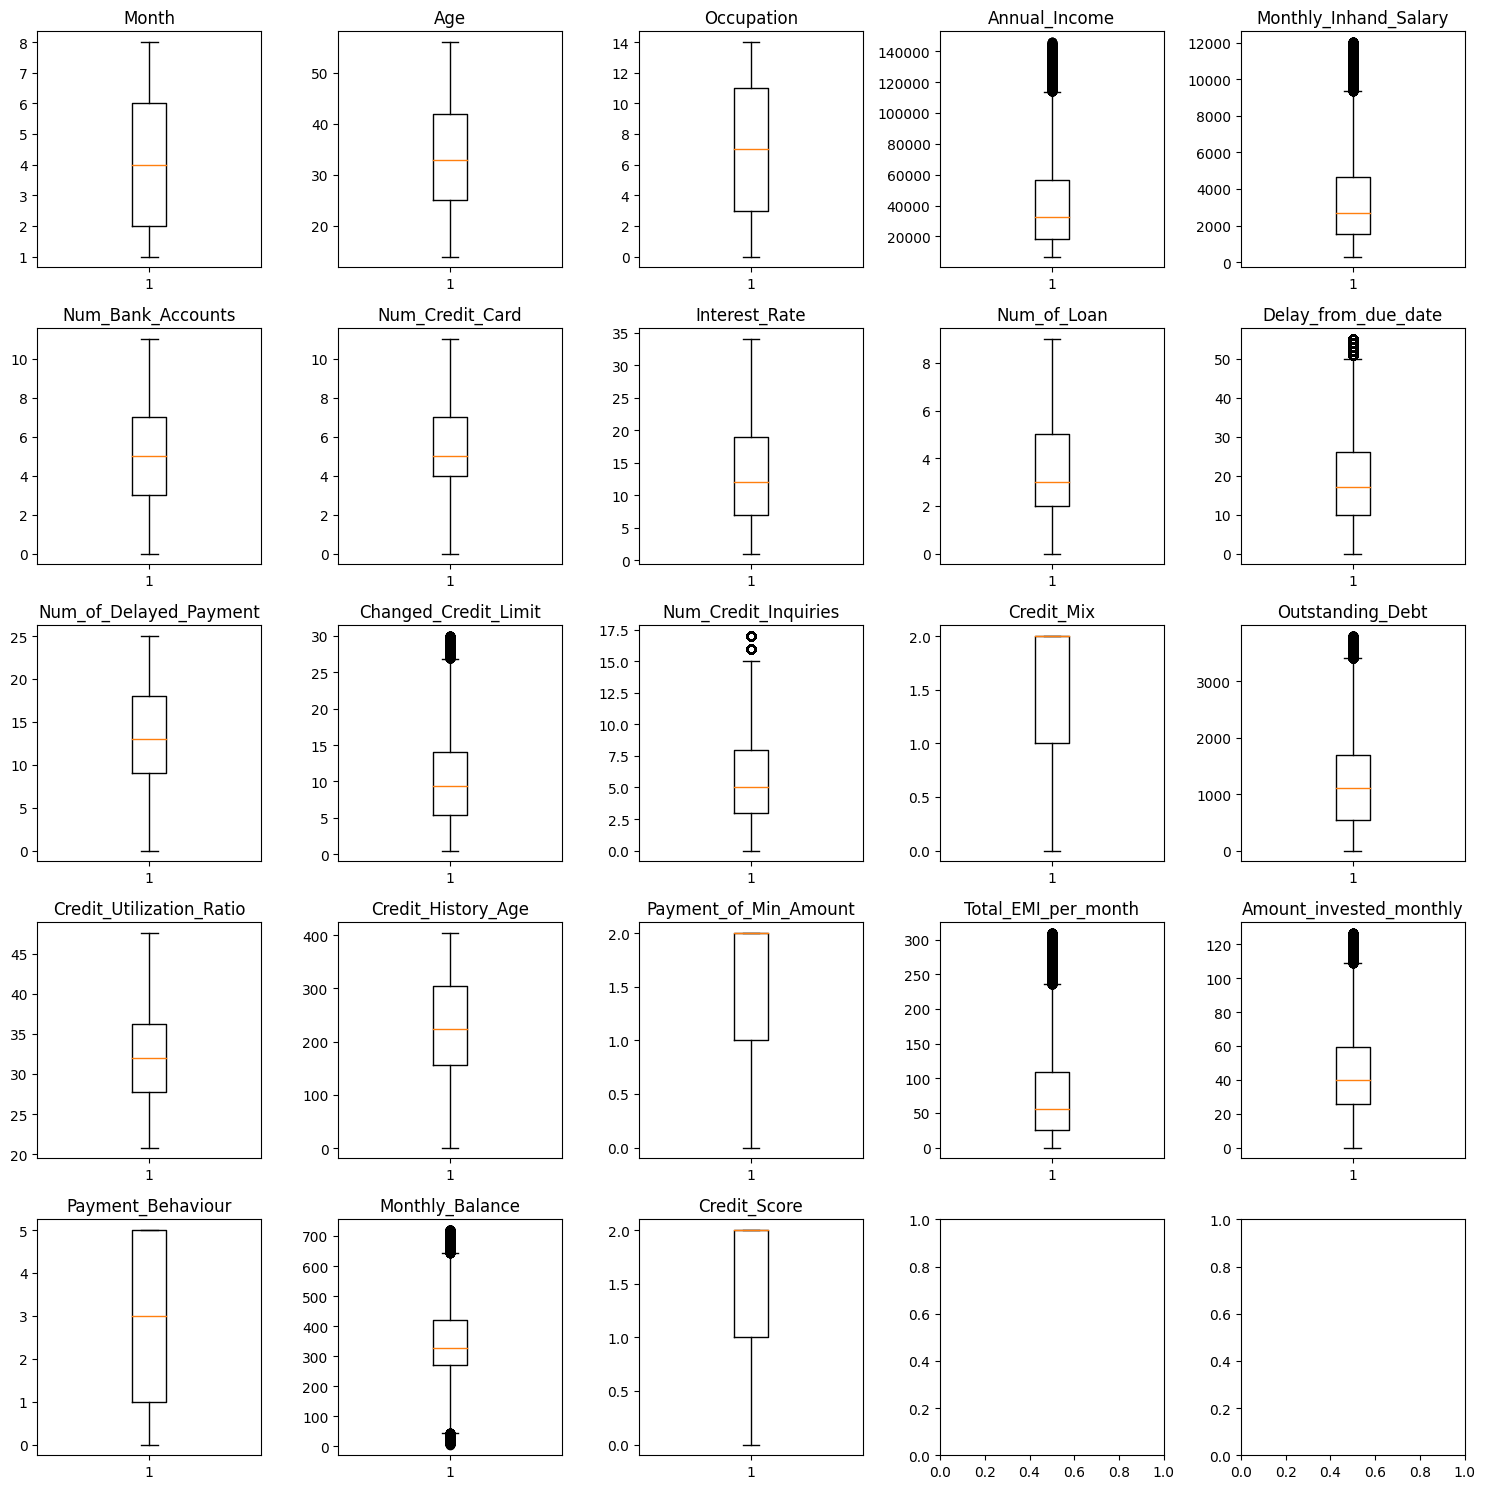

In [154]:
numeric_columns = new_data.select_dtypes(include=['float', 'int64']).columns

fig, axs = plt.subplots(5, 5, figsize=(15, 15))

for idx, col in enumerate(numeric_columns):
    if idx < 25:
        row_idx = idx // 5
        col_idx = idx % 5
        axs[row_idx, col_idx].boxplot(new_data[col])
        axs[row_idx, col_idx].set_title(col)

plt.tight_layout()
plt.show()

<Axes: >

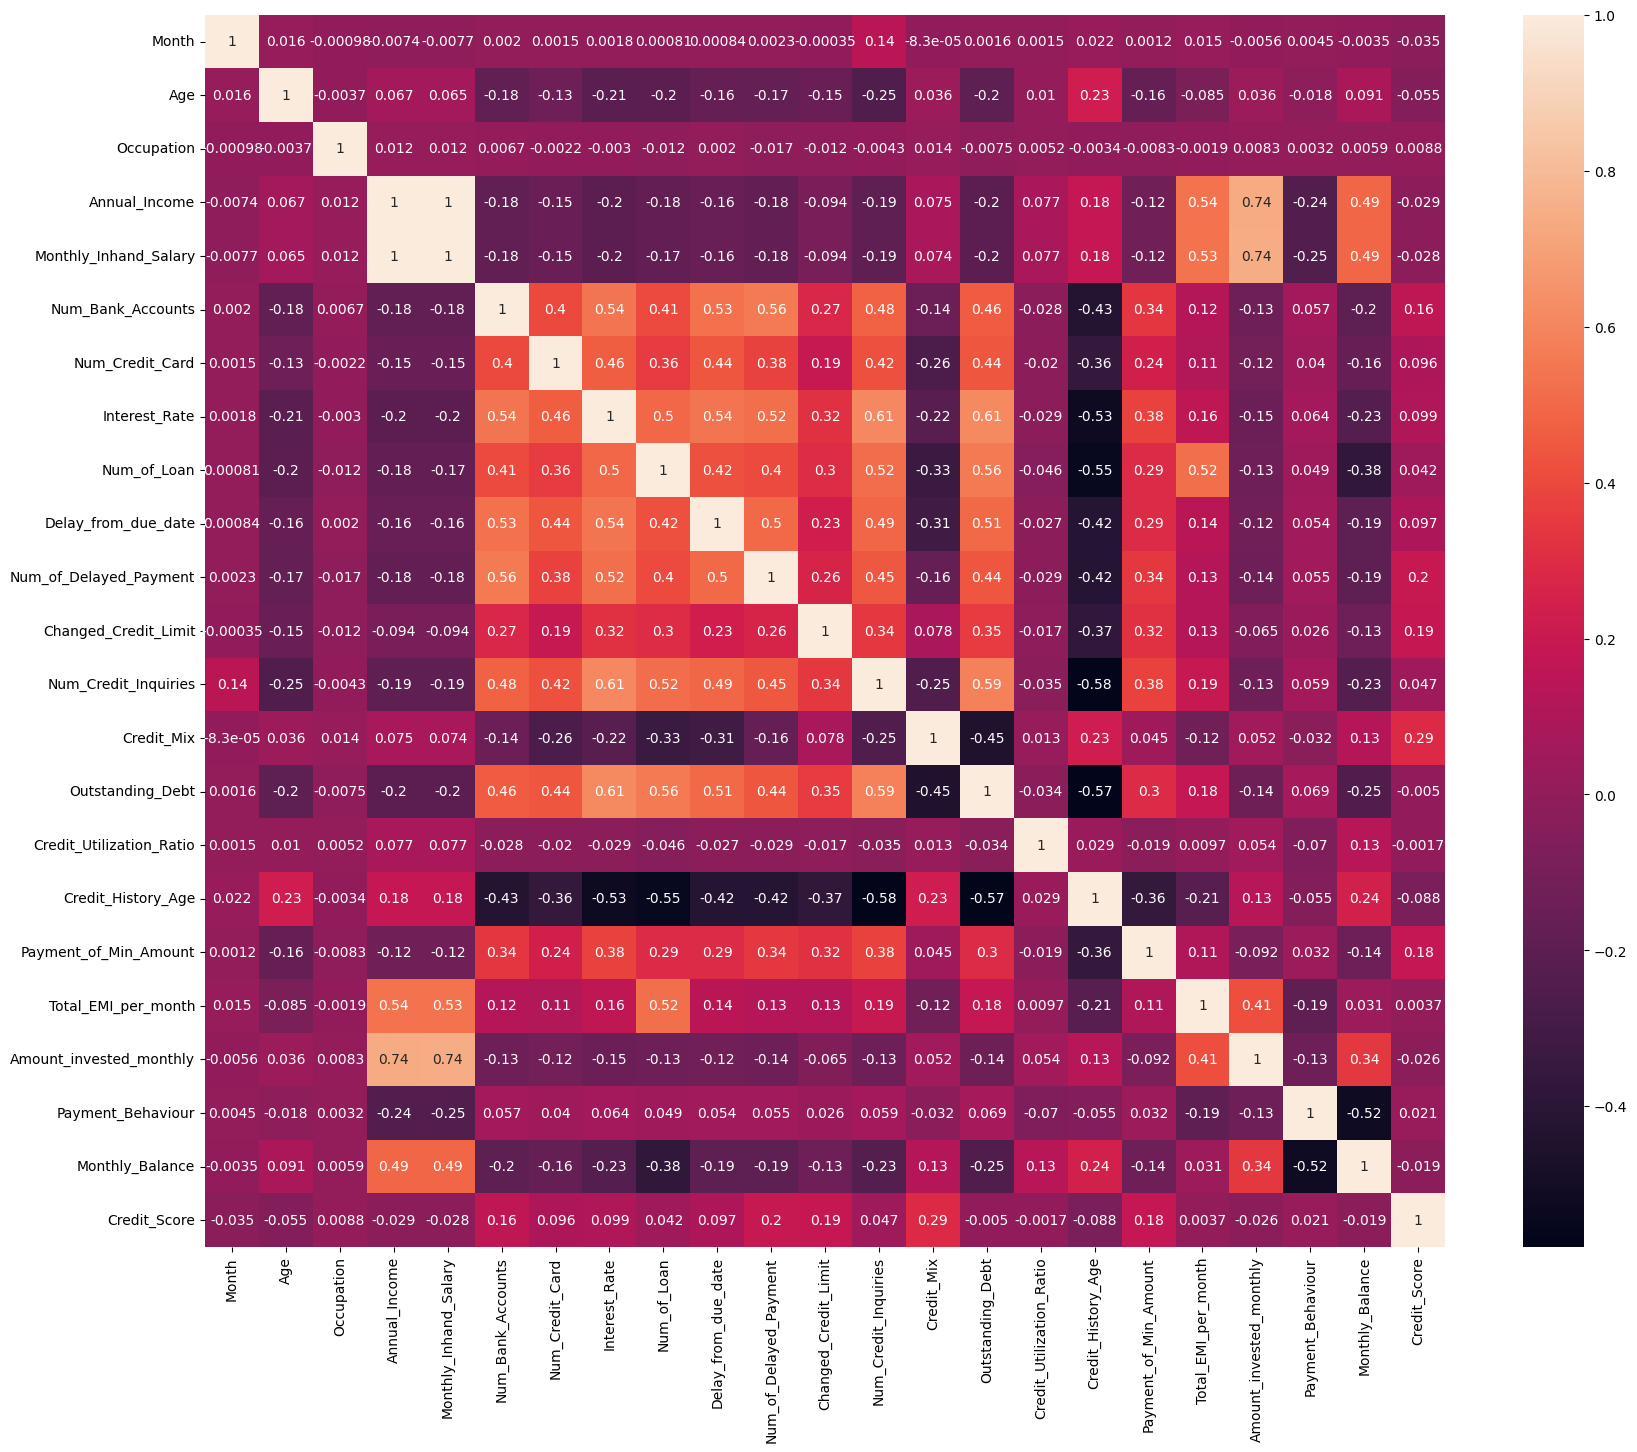

In [155]:
df_num = new_data.select_dtypes(include=['float','int64'])
corr_mat = df_num.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr_mat,annot=True)

In [156]:
c = corr_mat['Credit_Score'].abs().sort_values(ascending=False)

In [157]:
req_col = c[c>0.01]
req_col=req_col.index.tolist()

In [158]:
req_col

['Credit_Score',
 'Credit_Mix',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Payment_of_Min_Amount',
 'Num_Bank_Accounts',
 'Interest_Rate',
 'Delay_from_due_date',
 'Num_Credit_Card',
 'Credit_History_Age',
 'Age',
 'Num_Credit_Inquiries',
 'Num_of_Loan',
 'Month',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

In [159]:
new_data

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,26.822620,265.0,1,49.574949,21.465380,2,312.494089,0
1,2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,31.944960,266.0,1,49.574949,21.465380,3,284.629162,0
2,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,28.609352,267.0,1,49.574949,21.465380,4,331.209863,0
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,1,809.98,31.377862,268.0,1,49.574949,21.465380,5,223.451310,0
4,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,1,809.98,24.797347,269.0,1,49.574949,21.465380,1,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,...,1,502.38,34.663572,378.0,1,35.104023,24.028477,0,479.866228,1
99996,5,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,...,1,502.38,40.565631,379.0,1,35.104023,24.028477,1,496.651610,1
99997,6,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,...,1,502.38,41.255522,380.0,1,35.104023,24.028477,0,516.809083,1
99998,7,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,...,1,502.38,33.638208,381.0,1,35.104023,24.028477,3,319.164979,2


In [160]:
new_data = new_data.loc[:, req_col]
new_data.head()

,Credit_Score,Credit_Mix,Num_of_Delayed_Payment,Changed_Credit_Limit,Payment_of_Min_Amount,Num_Bank_Accounts,Interest_Rate,Delay_from_due_date,Num_Credit_Card,Credit_History_Age,Age,Num_Credit_Inquiries,Num_of_Loan,Month,Annual_Income,Monthly_Inhand_Salary,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0,1,7.0,11.27,1,3.0,3.0,3.0,4.0,265.0,23.0,4.0,4.0,1,19114.12,1824.843333,21.46538,2,312.494089
1,0,1,4.0,11.27,1,3.0,3.0,3.0,4.0,266.0,23.0,4.0,4.0,2,19114.12,1824.843333,21.46538,3,284.629162
2,0,1,7.0,11.27,1,3.0,3.0,3.0,4.0,267.0,23.0,4.0,4.0,3,19114.12,1824.843333,21.46538,4,331.209863
3,0,1,4.0,6.27,1,3.0,3.0,5.0,4.0,268.0,23.0,4.0,4.0,4,19114.12,1824.843333,21.46538,5,223.451310
4,0,1,4.0,11.27,1,3.0,3.0,6.0,4.0,269.0,23.0,4.0,4.0,5,19114.12,1824.843333,21.46538,1,341.489231


In [161]:
X = new_data.iloc[:,1:]
y = new_data.iloc[:,0]

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,shuffle=True,random_state=42)

In [163]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
features = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=features)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=features)
X_train.describe()

,Credit_Mix,Num_of_Delayed_Payment,Changed_Credit_Limit,Payment_of_Min_Amount,Num_Bank_Accounts,Interest_Rate,Delay_from_due_date,Num_Credit_Card,Credit_History_Age,Age,Num_Credit_Inquiries,Num_of_Loan,Month,Annual_Income,Monthly_Inhand_Salary,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
count,49915.000000,49915.000000,49915.000000,49915.000000,49915.000000,49915.000000,49915.000000,49915.000000,49915.000000,49915.000000,49915.000000,49915.000000,49915.000000,49915.000000,49915.000000,49915.000000,49915.000000,49915.000000
mean,-0.657938,0.012766,0.087519,-0.598818,0.069608,0.092686,0.144467,0.138662,0.021708,0.026147,0.125866,0.114301,0.119333,0.185332,0.186809,0.145100,-0.011364,0.165610
std,0.767441,0.667870,0.708191,0.693349,0.628032,0.701052,0.783299,0.664872,0.646901,0.637669,0.753676,0.751286,0.572346,0.705724,0.716584,0.764019,0.452254,0.849570
min,-2.000000,-1.444444,-1.033879,-2.000000,-1.250000,-1.000000,-1.062500,-1.666667,-1.506757,-1.117647,-1.000000,-1.000000,-0.750000,-0.669991,-0.769074,-1.210573,-0.750000,-2.145598
25%,-1.000000,-0.444444,-0.455607,-1.000000,-0.500000,-0.500000,-0.437500,-0.333333,-0.459459,-0.470588,-0.400000,-0.333333,-0.500000,-0.372176,-0.372592,-0.425208,-0.500000,-0.386194
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.555556,0.544393,0.000000,0.500000,0.500000,0.562500,0.666667,0.540541,0.529412,0.600000,0.666667,0.500000,0.627824,0.627408,0.574792,0.500000,0.613806
max,0.000000,1.333333,2.410047,0.000000,1.500000,1.750000,2.375000,2.000000,1.216216,1.352941,2.400000,2.000000,1.000000,2.988661,2.990056,2.613203,0.500000,2.625275


In [164]:
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8305539738062312
Confusion Matrix:
[[ 3337    32   839]
 [   82  5779  1052]
 [  824  1337 11304]]
